# Lab 5 Eddy-Covariance

##BACKGROUND:

Together we will recall the Keeling Curve and watch first 2 minutes of this video of the tower in Arizona that collected one of the datasets we will explore today:

https://tucson.com/news/science/environment/critical-zone-observatory-gets-grant-to-extend-research/article_aa4df9dc-a7a1-11e6-9f60-b341da1029a7.html

We're going to look at publicly available data through the Department of Energy's AmeriFlux network (https://ameriflux.lbl.gov/about/about-ameriflux/).  AmeriFlux is a community of scientists whose goals are to:

1.	Quantify the magnitude of the carbon sources and sinks for a range of terrestrial ecosystems in the Americas, and how they may be influenced by disturbance, management regimes, climate variability, nutrients, and atmospheric pollutants

2.	Advance understanding of processes regulating carbon assimilation, respiration, and storage

3.	Collect critical new information to help define the current global CO2 budget

4.	Enable improved predictions of future concentrations of atmospheric CO2

Descriptions of the two sites we will investigate today can be found below:

1) Mount Bigelow near Tucson, AZ:  https://ameriflux.lbl.gov/sites/siteinfo/US-MtB

2) Howland Forest near Bangor, ME:  https://ameriflux.lbl.gov/sites/siteinfo/US-Ho1

Because the data is collected every 30 minutes and includes measurements made by many instruments, this is Big Data!  As such, these data are usually not handled in Excel (though they can be stored in excel .csv spreadsheets) and we will work with a new program to plot these data: Python.

GOALS OF THE LAB:

●	Examine eddy covariance ${\text{CO}_2}$ flux data from one site in Maine and one site in Arizona

●	Get experience working with big datasets using Python

###ASSIGNMENT:
Work through the following steps to learn more about carbon fluxes in forested areas of Maine and Arizona using Python. You will be asked some simple questions regarding what is happening during our data analysis. No prior coding experience is required!

Complete all questions and submit your answers by the due date.


### Part 1: The Data

We first need to upload our data to Python to work with. This can be done by using some code that will import the data file and make it available to call upon.

In [1]:
# Code block containing all of the libraries we will use
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime
from scipy import stats

In [2]:
# Code to import data as a data frame, files are large, may take some time
M_data = pd.read_csv("Maine_Reduced.csv", delimiter=",")
A_data = pd.read_csv("Ariz_Reduced.csv", delimiter=",")

We can visually check our file running the code:

```
print(df)
```
Where "df" is the name of the data frame we want to print. This produces a snippet of what the data looks like.


In [3]:
# Print out Maine data
print(M_data)

        TIMESTAMP_START  FC_1_1_1  CO2_1_1_1  P_RAIN_1_1_1
0          199601010000   -9999.0    -9999.0           0.0
1          199601010030   -9999.0    -9999.0           0.0
2          199601010100   -9999.0    -9999.0           0.0
3          199601010130   -9999.0    -9999.0           0.0
4          199601010200   -9999.0    -9999.0           0.0
...                 ...       ...        ...           ...
495260     202403312200   -9999.0    -9999.0           0.0
495261     202403312230   -9999.0    -9999.0           0.0
495262     202403312300   -9999.0    -9999.0           0.0
495263     202403312330   -9999.0    -9999.0           0.0
495264     202404010000   -9999.0    -9999.0           0.0

[495265 rows x 4 columns]


In [4]:
# print out Arizona data
print(A_data)

        TIMESTAMP_START      FC     CO2    P_1_1_1
0          200901010000 -9999.0 -9999.0 -9999.0000
1          200901010030 -9999.0 -9999.0 -9999.0000
2          200901010100 -9999.0 -9999.0 -9999.0000
3          200901010130 -9999.0 -9999.0 -9999.0000
4          200901010200 -9999.0 -9999.0 -9999.0000
...                 ...     ...     ...        ...
227899     202112312130 -9999.0 -9999.0     0.5836
227900     202112312200 -9999.0 -9999.0     0.5836
227901     202112312230 -9999.0 -9999.0     0.4377
227902     202112312300 -9999.0 -9999.0     0.5836
227903     202112312330 -9999.0 -9999.0     1.0213

[227904 rows x 4 columns]


## Q1)

###How many rows/columns are in M_data?

###How many rows/columns are in A_data?

The original data files for each of these locations is significantly larger than what we are working with. I have reduced the files down to just 4 columns:

1.   TIMESTAMP_START = Start time of 30 minute averaging period
2.   FC = Carbon flux
3.   C02 = Average $\text{CO}_2$
4.   P_1_1_1 = Total precipitation over time interval

You might be wondering why some values are given as "-9999". This represents a point where no data was taken. We will want to replace "-9999" values in our table with NaN (Not a Number). This way, we can plot the data without it causing issues.

In [5]:
# Replace -9999 values with NaN so we can plot the data
M_data = M_data.replace(-9999, np.nan)
A_data = A_data.replace(-9999, np.nan)

In [6]:
# Print out M_data to visually check we replaced -9999 values with NaN
print(A_data)

        TIMESTAMP_START  FC  CO2  P_1_1_1
0          200901010000 NaN  NaN      NaN
1          200901010030 NaN  NaN      NaN
2          200901010100 NaN  NaN      NaN
3          200901010130 NaN  NaN      NaN
4          200901010200 NaN  NaN      NaN
...                 ...  ..  ...      ...
227899     202112312130 NaN  NaN   0.5836
227900     202112312200 NaN  NaN   0.5836
227901     202112312230 NaN  NaN   0.4377
227902     202112312300 NaN  NaN   0.5836
227903     202112312330 NaN  NaN   1.0213

[227904 rows x 4 columns]


The last step before we can plot the data is to change change the TIMESTAMP value to something that will plot correctly. The TIMESTAMP values are given in yyyyMMddHHmm format. Luckily, we can use a function in PANDAS to convert to a "datetime" format.

In [7]:
# Convert TIMESTAMP to a datetime format
M_t = pd.to_datetime(M_data['TIMESTAMP_START'], format='%Y%m%d%H%M')   # Maine datetime
A_t = pd.to_datetime(A_data['TIMESTAMP_START'], format='%Y%m%d%H%M')   # Ariz datetime

From here, we can write our own function that will convert the datetime format to a decimal date format. For example: 2024, 10, 01, 14, 30 = 2024.7502846 in decimal date.

While giving the year as a decimal date doesn't help us differentiate day to day, it is very helpful in the analysis of time series datasets.

In [8]:
# A function to convert dates into decimal date format

def datetime_to_decimal_date(dt):
  """Converts a datetime object to a decimal date yyyy.#### format.

  Args:
    dt: The datetime object.

  Returns:
    The decimal date in yyyy.#### format.
  """
  year = dt.year
  start_of_year = datetime.datetime(year, 1, 1)
  days_in_year = (datetime.datetime(year + 1, 1, 1) - start_of_year).days

  decimal_date = year + ((dt - start_of_year).total_seconds() / (days_in_year * 24 * 60 * 60))

  return decimal_date

In [9]:
# Arrays containing converted decimal dates
M_t = M_t.apply(datetime_to_decimal_date)   # Maine
A_t = A_t.apply(datetime_to_decimal_date)   # Ariz

In [10]:
# Print out M_t array to check we have a decimal date
print(M_t)

0         1996.000000
1         1996.000057
2         1996.000114
3         1996.000171
4         1996.000228
             ...     
495260    2024.248406
495261    2024.248463
495262    2024.248520
495263    2024.248577
495264    2024.248634
Name: TIMESTAMP_START, Length: 495265, dtype: float64


## Q2) Use the code below to calculate the decimal date format of a date of your choice (birthday, graduation day, favorite holiday, etc).

In [11]:
# Enter your date below (yyyy, MM, dd, HH,mm)
dt = datetime.datetime(2024, 10, 1, 14, 30)
decimal_date = datetime_to_decimal_date(dt)
print(decimal_date)

2024.750284608379


### Part 2: Plots

Now that we have our data in a form that is usable, we can make some plots to visually evaluate what information the data contain.

We can make 3 plots:


1.   $\text{CO}_2$ vs Date
2.   Carbon Flux vs Date
3.   Precipitation vs Date
4.   Carbon Flux vs Precipitation

Let's first look at $\text{CO}_2$ vs Date.

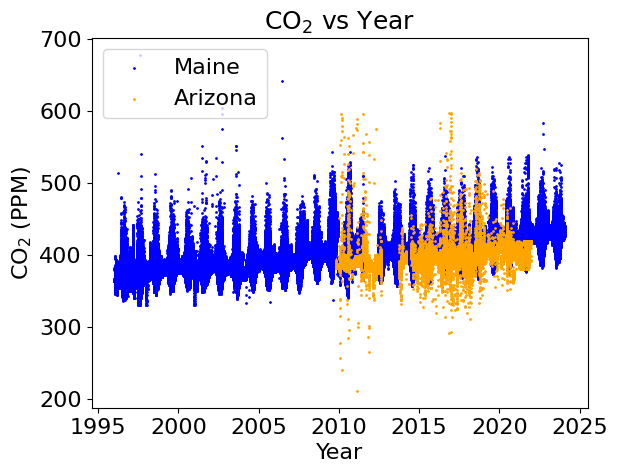

In [12]:
# CO2 vs Year plot
fig, ax = plt.subplots()
txt = 'black'
p1 = ax.scatter(M_t, M_data['CO2_1_1_1'], label='Maine', color = 'blue', s=1)
p2 = ax.scatter(A_t, A_data['CO2'], label='Arizona', color = 'orange', s=1)
ax.set_ylabel(r'CO$_2$ (PPM)', color=txt, fontsize=16)
ax.set_xlabel(r'Year', color=txt, fontsize=16)
ax.set_title(r'CO$_2$ vs Year', color=txt, fontsize = 18)
ax.tick_params(axis='x', labelsize=16, colors=txt)
ax.tick_params(axis='y', labelsize=16, colors=txt)
plt.rcParams["figure.figsize"] = (10,10)
ax.legend(loc='upper left', fontsize = 16)
plt.show()

We can add a Moving Average to better see the trend behavior in each plot.

In [13]:
# Calculate the moving average over a set window size
window_size = 100
M_moving_avg = M_data['CO2_1_1_1'].rolling(window=window_size,center=True).mean()
A_moving_avg = A_data['CO2'].rolling(window=window_size,center=True).mean()

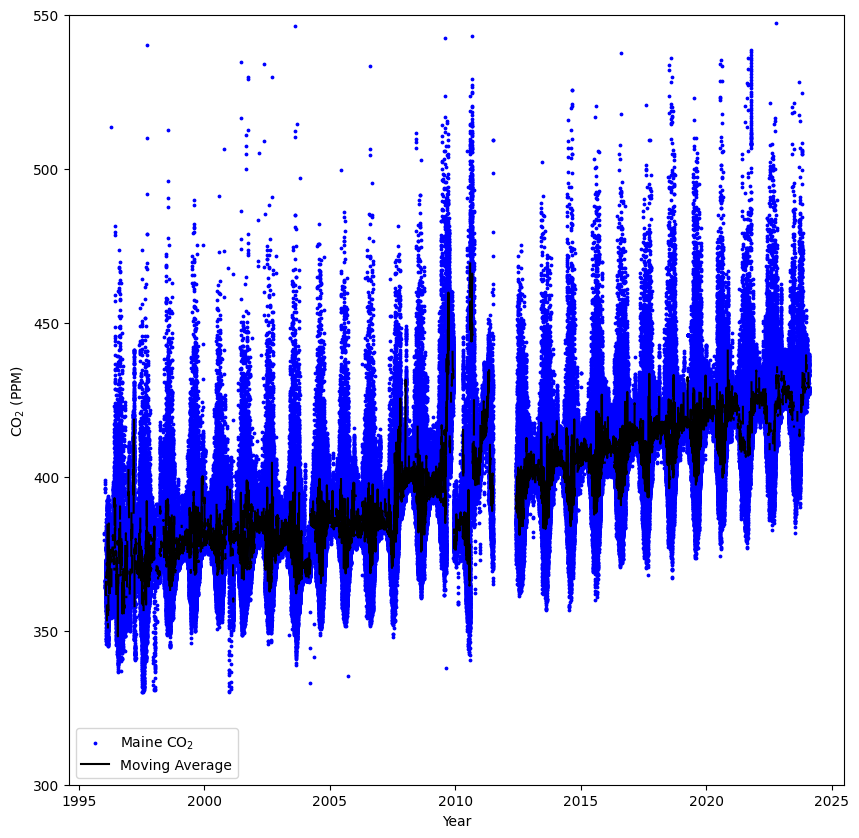

In [14]:
# Create a scatter plot of the original and filtered data
plt.scatter(M_t, M_data['CO2_1_1_1'], color = 'blue', label='Maine CO$_2$', s=3)
plt.plot(M_t, M_moving_avg, label='Moving Average', color='black')
plt.xlabel('Year')
plt.ylabel('CO$_2$ (PPM)')
plt.legend()
plt.ylim(300, 550)
plt.show()

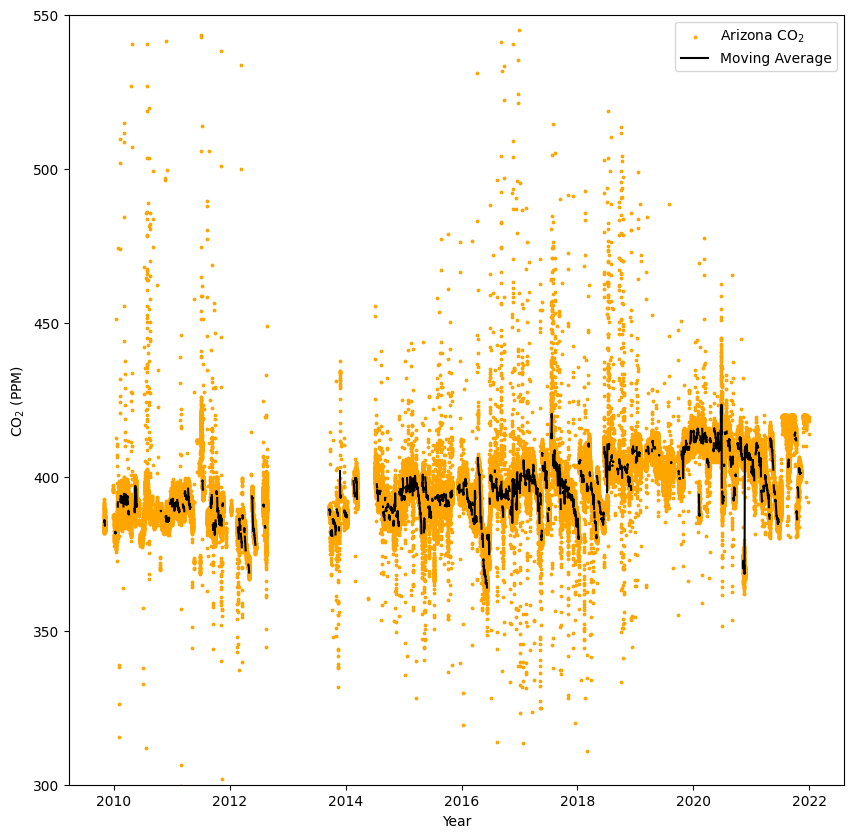

In [15]:
# Create a scatter plot of the original and filtered data
plt.scatter(A_t, A_data['CO2'], color = 'orange', label='Arizona CO$_2$', s=3)
plt.plot(A_t, A_moving_avg, label='Moving Average', color='black')
plt.xlabel('Year')
plt.ylabel('CO$_2$ (PPM)')
plt.legend()
plt.ylim(300, 550)
plt.show()

### Consider the 3 plots above ($\text{CO}_2$ vs Year) as you answer the following questions:

###Q3) Describe the features present in the plot comparing $\text{CO}_2$ measurements in Maine to measurements in Arizona. Can you think of reasons why they may have different behaviors?

###Q4) Compare each plot to that of the Keeling Curve (you may want to google it if you don't remember what it looks like). Does one location appear to match better with the Keeling Curve than the other?  

Maine trend from 2015 to 2020: 2.50 [PPM/yr]
Arizona trend from 2015 to 2020: 2.78 [PPM/yr]


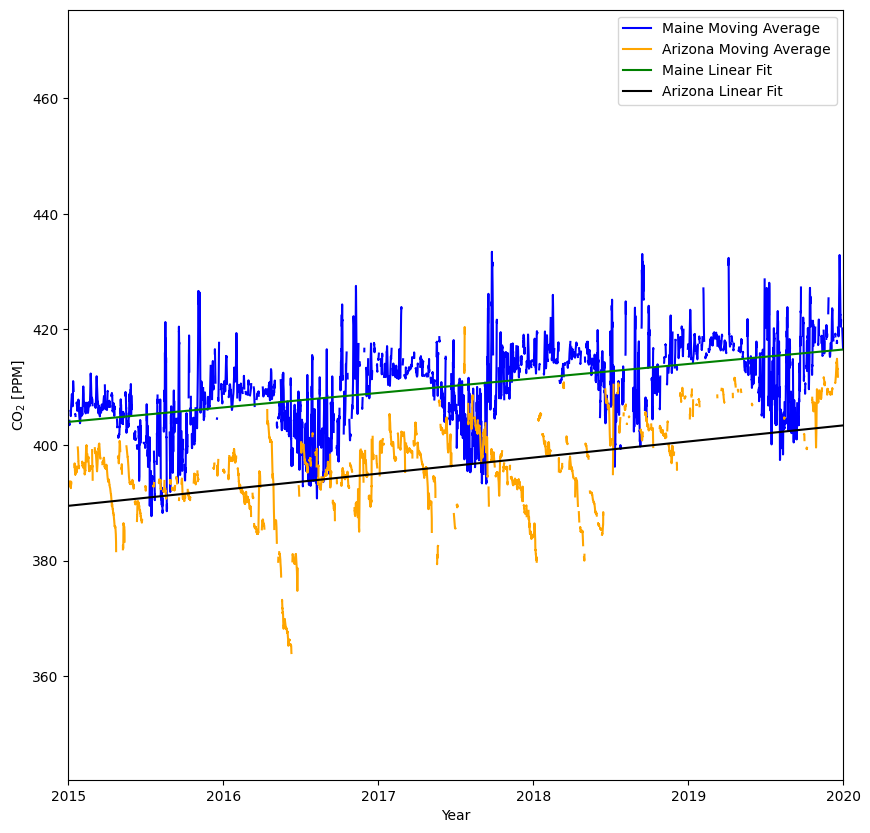

In [16]:
# Filter data for the 2015-2020 time period
start_year = 2015
end_year = 2020

# Maine Filtered
filtered_data_M = M_data[(M_t >= start_year) & (M_t <= end_year)]
filtered_moving_avg_M = M_moving_avg[(M_t >= start_year) & (M_t <= end_year)]
filtered_t_M = M_t[(M_t >= start_year) & (M_t <= end_year)]

# Arizona Filtered
filtered_data_A = A_data[(A_t >= start_year) & (A_t <= end_year)]
filtered_moving_avg_A = A_moving_avg[(A_t >= start_year) & (A_t <= end_year)]
filtered_t_A = A_t[(A_t >= start_year) & (A_t <= end_year)]

# Remove NaN values
valid_indices_M = np.isfinite(filtered_moving_avg_M) # Create a separate valid_indices for Maine
valid_indices_A = np.isfinite(filtered_moving_avg_A) # Create a separate valid_indices for Arizona
filtered_t_M = filtered_t_M[valid_indices_M]
filtered_t_A = filtered_t_A[valid_indices_A]
filtered_moving_avg_M = filtered_moving_avg_M[valid_indices_M]
filtered_moving_avg_A = filtered_moving_avg_A[valid_indices_A]

# Perform linear regression and get uncertainty
M_slope, M_intercept, M_r_value, M_p_value, M_std_err = stats.linregress(filtered_t_M, filtered_moving_avg_M)
A_slope, A_intercept, A_r_value, A_p_value, A_std_err = stats.linregress(filtered_t_A, filtered_moving_avg_A)

# Print the slope and uncertainty
print(f"Maine trend from {start_year} to {end_year}: {M_slope:.2f} [PPM/yr]")
print(f"Arizona trend from {start_year} to {end_year}: {A_slope:.2f} [PPM/yr]")

# Generate y-values for the linear fit
x_fit = np.linspace(start_year, end_year, 100)
y_fit_M = M_slope * x_fit + M_intercept
y_fit_A = A_slope * x_fit + A_intercept

# Plot the original data, moving average, and linear fit
plt.plot(M_t, M_moving_avg, label='Maine Moving Average', color='blue')
plt.plot(A_t, A_moving_avg, label='Arizona Moving Average', color='orange')
plt.plot(x_fit, y_fit_M, label='Maine Linear Fit', color='green')
plt.plot(x_fit, y_fit_A, label='Arizona Linear Fit', color='black')
plt.xlabel('Year')
plt.ylabel('CO$_2$ [PPM]')
plt.legend()
plt.xlim(2015, 2020)
plt.show()

### Consider the above plot as you answer the following.

###Q5) What are the linear trend values for Maine and Arizona?

###Q6) What does the linear trend physically represent?

###Q7) How do they compare against the linear trend of the Keeling Curve? Why might they be different?

From here, lets look at how Carbon Flux and precipitation may be correlated by plotting them together on the same plot for each location.

In [32]:
# We want to center the plot so that both y-axis will have the same "0" location

# Find the minimum and maximum values of both datasets
min_value = min(M_data['P_RAIN_1_1_1'].min(), M_data['FC_1_1_1'].min())
max_value = max(M_data['P_RAIN_1_1_1'].max(), M_data['FC_1_1_1'].max())

# Calculate the range of the data
data_range = max_value - min_value

# Set the y-limits for both axes
ax1.set_ylim(min_value - 0.1 * data_range, max_value + 0.1 * data_range)
ax2.set_ylim(min_value - 0.1 * data_range, max_value + 0.1 * data_range)

(-57.003823, 161.950493)

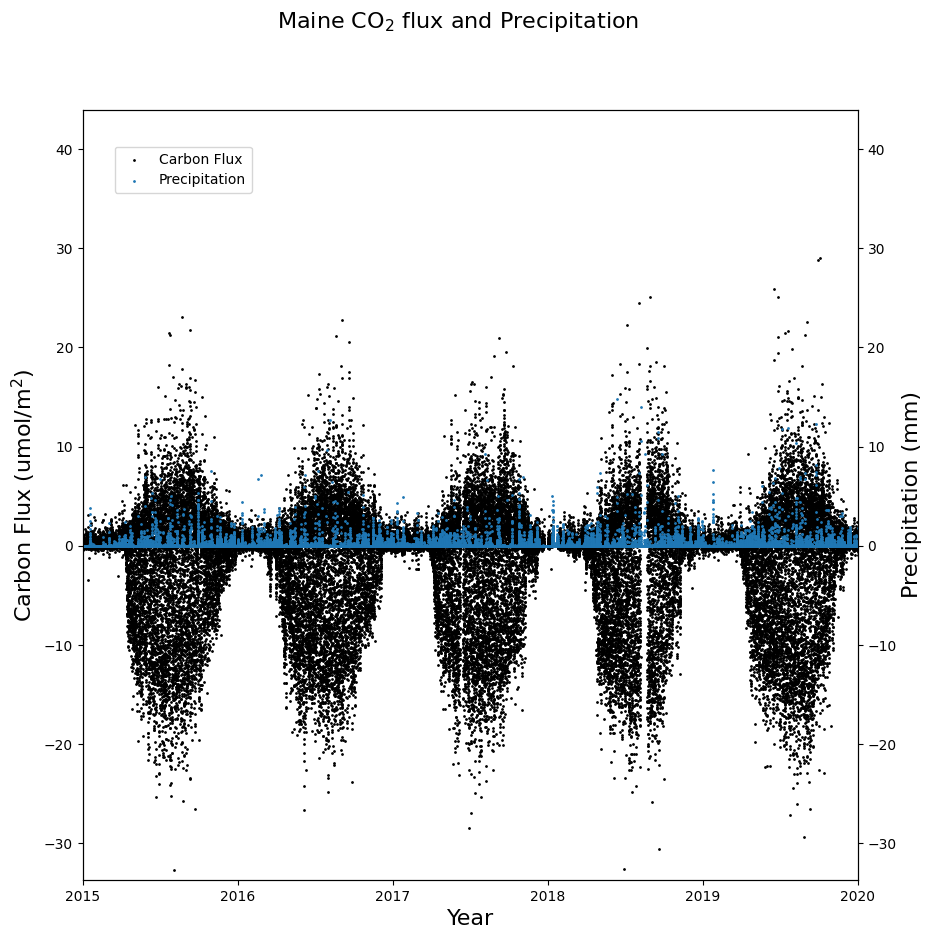

In [39]:
# Maine Carbon Flux vs Year and Precipitation vs Year
fig, ax1 = plt.subplots()

txt = 'black'
p1 = ax1.scatter(M_t, M_data['FC_1_1_1'], label='Carbon Flux', color = 'black', s=1)
ax1.set_ylabel(r'Carbon Flux (umol/m$^2$)', color=txt, fontsize=16)
ax1.set_xlabel(r'Year', color=txt, fontsize=16)
ax1.set_ylim(min_value - 0.1 * data_range, max_value + 0.1 * data_range)

ax2 = ax1.twinx()
p2 = ax2.scatter(M_t, M_data['P_RAIN_1_1_1'], label='Precipitation', s=1)
ax2.set_ylabel(r'Precipitation (mm)', color=txt, fontsize=16)
ax2.set_ylim(min_value - 0.1 * data_range, max_value + 0.1 * data_range)

handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
handles = handles1 + handles2
labels = labels1 + labels2
fig.legend(handles, labels, loc='upper left', bbox_to_anchor=(0.15, 0.85))
fig.suptitle('Maine CO$_2$ flux and Precipitation', fontsize=16)
plt.rcParams["figure.figsize"] = (10,10)
plt.xlim(2015, 2020)
plt.show()


### Use the above plot (Maine $\text{CO}_2$ Flux and Precipitation) to answer the following questions:

###Q8) What does a negative (-) value physically represent in terms of $\text{CO}_2$ Flux?

###Q9) Explain the behavior of the $\text{CO}_2$ Flux in the plot above. At approximately what time of year does Maine see the largest negative $\text{CO}_2$ Flux values? Explain why this makes sense.

###Q10) Does there appear to be much correlation between precipitation and $\text{CO}_2$ Flux in Maine? Can you explain why this?

Now let's do the same for Arizona.

In [34]:
# We want to center the plot so that both y-axis will have the same "0" location

# Find the minimum and maximum values of both datasets
min_value = min(A_data['P_1_1_1'].min(), A_data['FC'].min())
max_value = max(A_data['P_1_1_1'].max(), A_data['FC'].max())

# Calculate the range of the data
data_range = max_value - min_value

# Set the y-limits for both axes
ax1.set_ylim(min_value - 0.1 * data_range, max_value + 0.1 * data_range)
ax2.set_ylim(min_value - 0.1 * data_range, max_value + 0.1 * data_range)

(-33.6887, 43.9717)

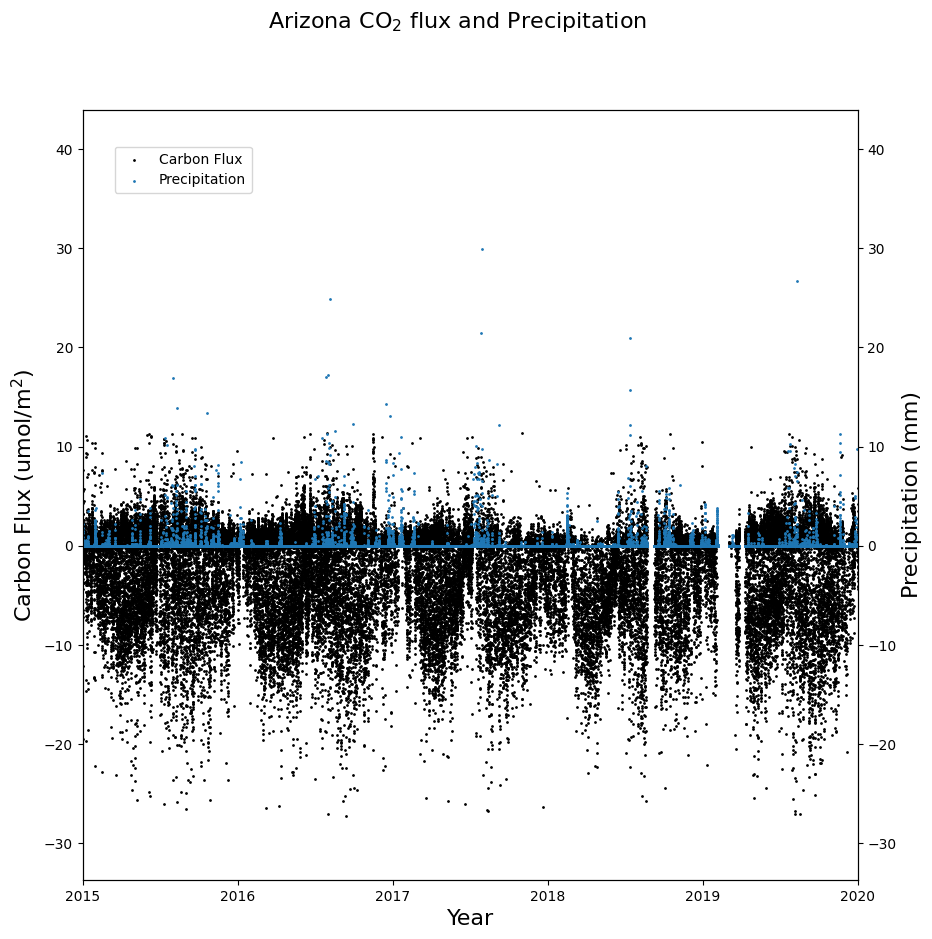

In [40]:
# Arizona Carbon Flux vs Year and Precipitation vs Year
fig, ax1 = plt.subplots()

txt = 'black'
p1 = ax1.scatter(A_t, A_data['FC'], label='Carbon Flux', color = 'black', s=1)
ax1.set_ylabel(r'Carbon Flux (umol/m$^2$)', color=txt, fontsize=16)
ax1.set_xlabel(r'Year', color=txt, fontsize=16)
ax1.set_ylim(min_value - 0.1 * data_range, max_value + 0.1 * data_range)

ax2 = ax1.twinx()
p2 = ax2.scatter(A_t, A_data['P_1_1_1'], label='Precipitation', s=1)
ax2.set_ylabel(r'Precipitation (mm)', color=txt, fontsize=16)
ax2.set_ylim(min_value - 0.1 * data_range, max_value + 0.1 * data_range)

handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
handles = handles1 + handles2
labels = labels1 + labels2
fig.legend(handles, labels, loc='upper left', bbox_to_anchor=(0.15, 0.85))
fig.suptitle('Arizona CO$_2$ flux and Precipitation', fontsize=16)
plt.rcParams["figure.figsize"] = (10,10)
plt.xlim(2015, 2020)
plt.show()

### Use the above plot (Arizona $\text{CO}_2$ Flux and Precipitation) to answer the following questions:

###Q11) Compare the $\text{CO}_2$ Flux behavior in Arizona with Maine. Can you determine any specific pattern in Arizona $\text{CO}_2$ Flux.

###Q12) Look at the time of year (x-axis) for the precipitation groupings. At what time of year does Arizona typically see precipitation?

###Q13) There is a negative $\text{CO}_2$ Flux after each large precipitation grouping in Arizona. Explain this behavior.  